In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [7]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## To get information about data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## To Check missing value in data

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

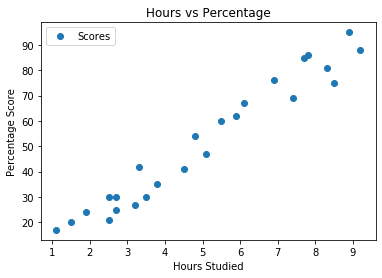

In [10]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Plotting a scatter plot Hours vs percentage

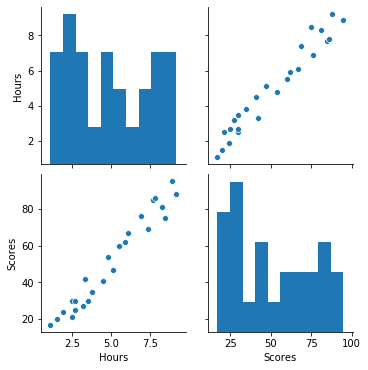

In [11]:
import seaborn as sns
sns.pairplot(data)

In [12]:
data.corr() #Correlation coefficent

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### From Correlation matrix we conclude that Hours and Score are positively correlated

## Separating variables into train and test data

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
m = reg.coef_ 
print('slope:',m)

slope: [9.91065648]


In [16]:
c=reg.intercept_
print('intercept:',c)

intercept: 2.018160041434683


In [17]:
#y = m*x+c  Regression line
line = m * X + c 

## Feeting Regression line

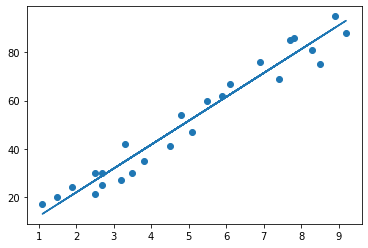

In [18]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

## Finding the Prediction for test data

In [19]:
pred = reg.predict(x_test) # Predicting the scores
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 4.183859899002975


In [22]:
y_pred=reg.predict(X)
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,21,26.794801
1,47,52.562508
2,27,33.732261
3,75,86.258740
4,30,36.705458
5,20,16.884145
6,88,93.196200
7,60,56.526771
8,81,84.276609
9,25,28.776933


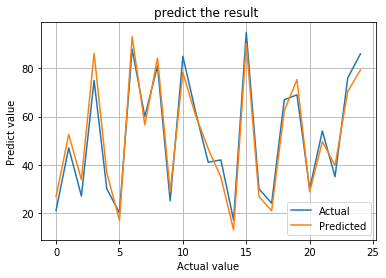

In [23]:
df1.plot()
plt.grid()
plt.xlabel('Actual value')
plt.ylabel("Predict value")
plt.title("predict the result ")
plt.show()

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y, y_pred)) 

Mean Absolute Error: 4.986053347144891


In [25]:
# You can also test with your own data
Hours = [[9.25]]
ypred = reg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(ypred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


#### Here we get 'predicted score = 93.69' when 'hours of study =9.25 hours'
